# **Import Modules**

## *python*

In [1]:
import os
import sys

import arviz as az

## *custom*

In [2]:
# Import customised modules
# Define path
sys.path.append(os.path.abspath(os.path.join("..")))

# Import relevant modules
try:
    from scripts._03_bayesian_inference_vis import ChangePointAnalysis

    print("Module successfully imported.")

except ImportError:
    print("Could not import module from `scripts/`.")

Module successfully imported.


# **Bayesian Model Interpretation**

In [3]:
# Load class input paths
# Specify directory
ntbk_dir = os.getcwd()  # Gets the directory of the notebook

log_price_path = os.path.join(
    ntbk_dir, "..", "data", "processed", "BrentOilPrices_Log.csv"
)
events_path = os.path.join(ntbk_dir, "..", "data", "raw", "Events.csv")
processed_dir = os.path.join(ntbk_dir, "..", "data", "processed")
plot_dir = os.path.join(ntbk_dir, "..", "insights", "model")

# Load previously saved trace
trace_path = os.path.join(ntbk_dir, "..", "data", "processed", "model_trace.nc")
trace = az.from_netcdf(trace_path)

In [4]:
# Create model instance
model = ChangePointAnalysis(
    log_price_path=log_price_path,
    trace=trace,
    events_path=events_path,
    processed_dir=processed_dir,
    plot_dir=plot_dir,
)

ChangePointAnalysis Class initalised ...



💾 Trace plot saved to ..\insights\model\trace_plot.png


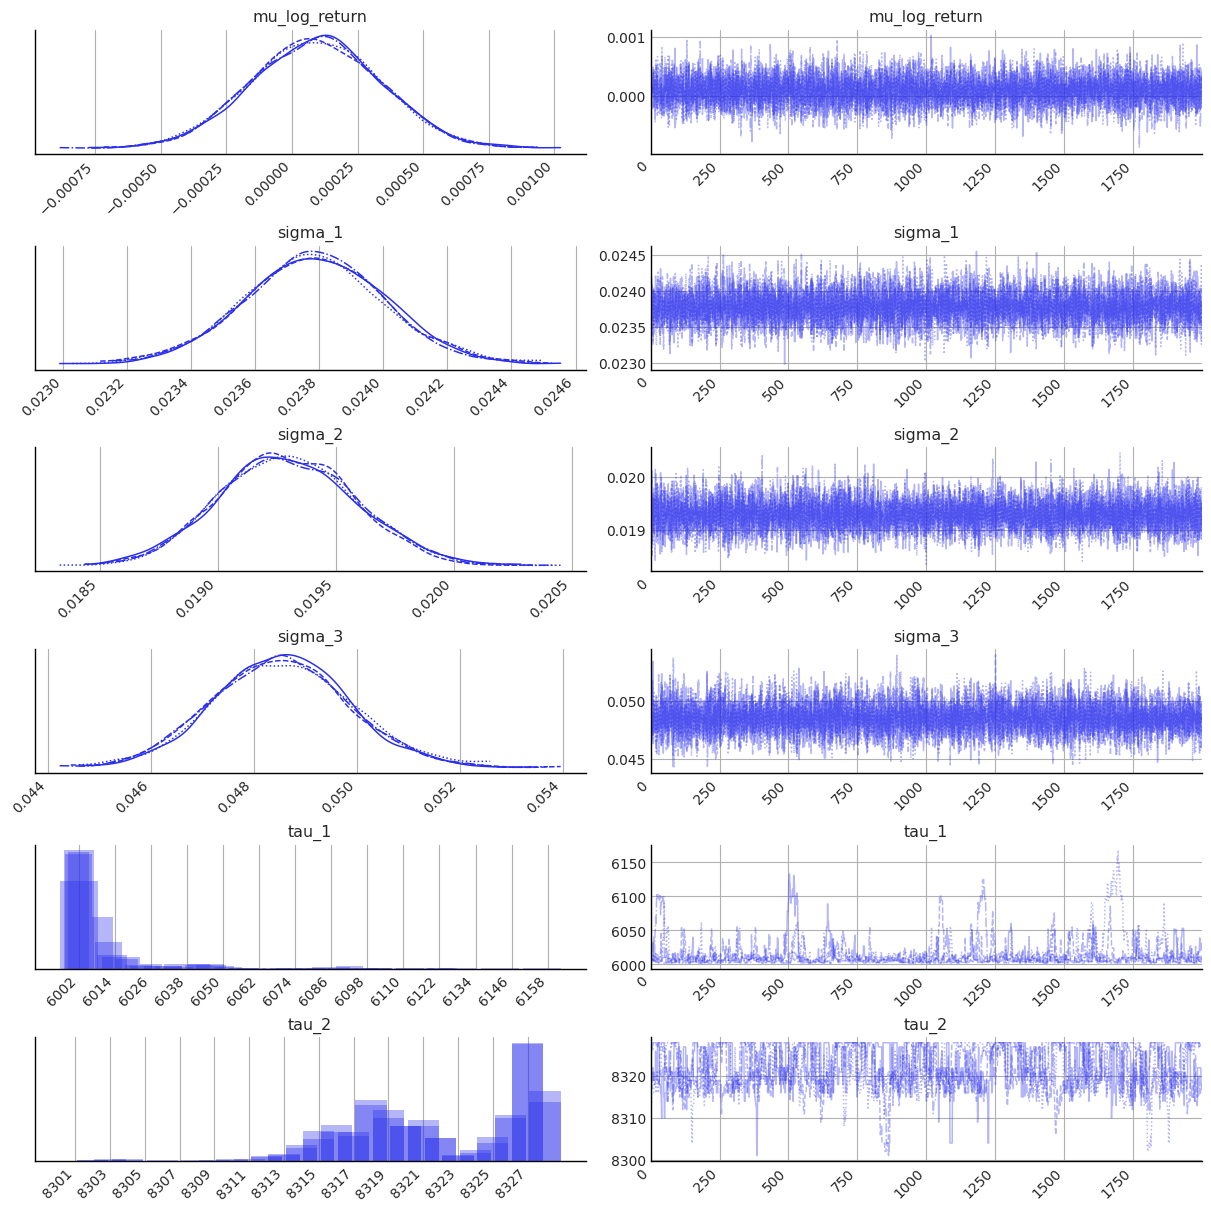

💾 Posterior plot saved to ..\insights\model\posterior_plot.png


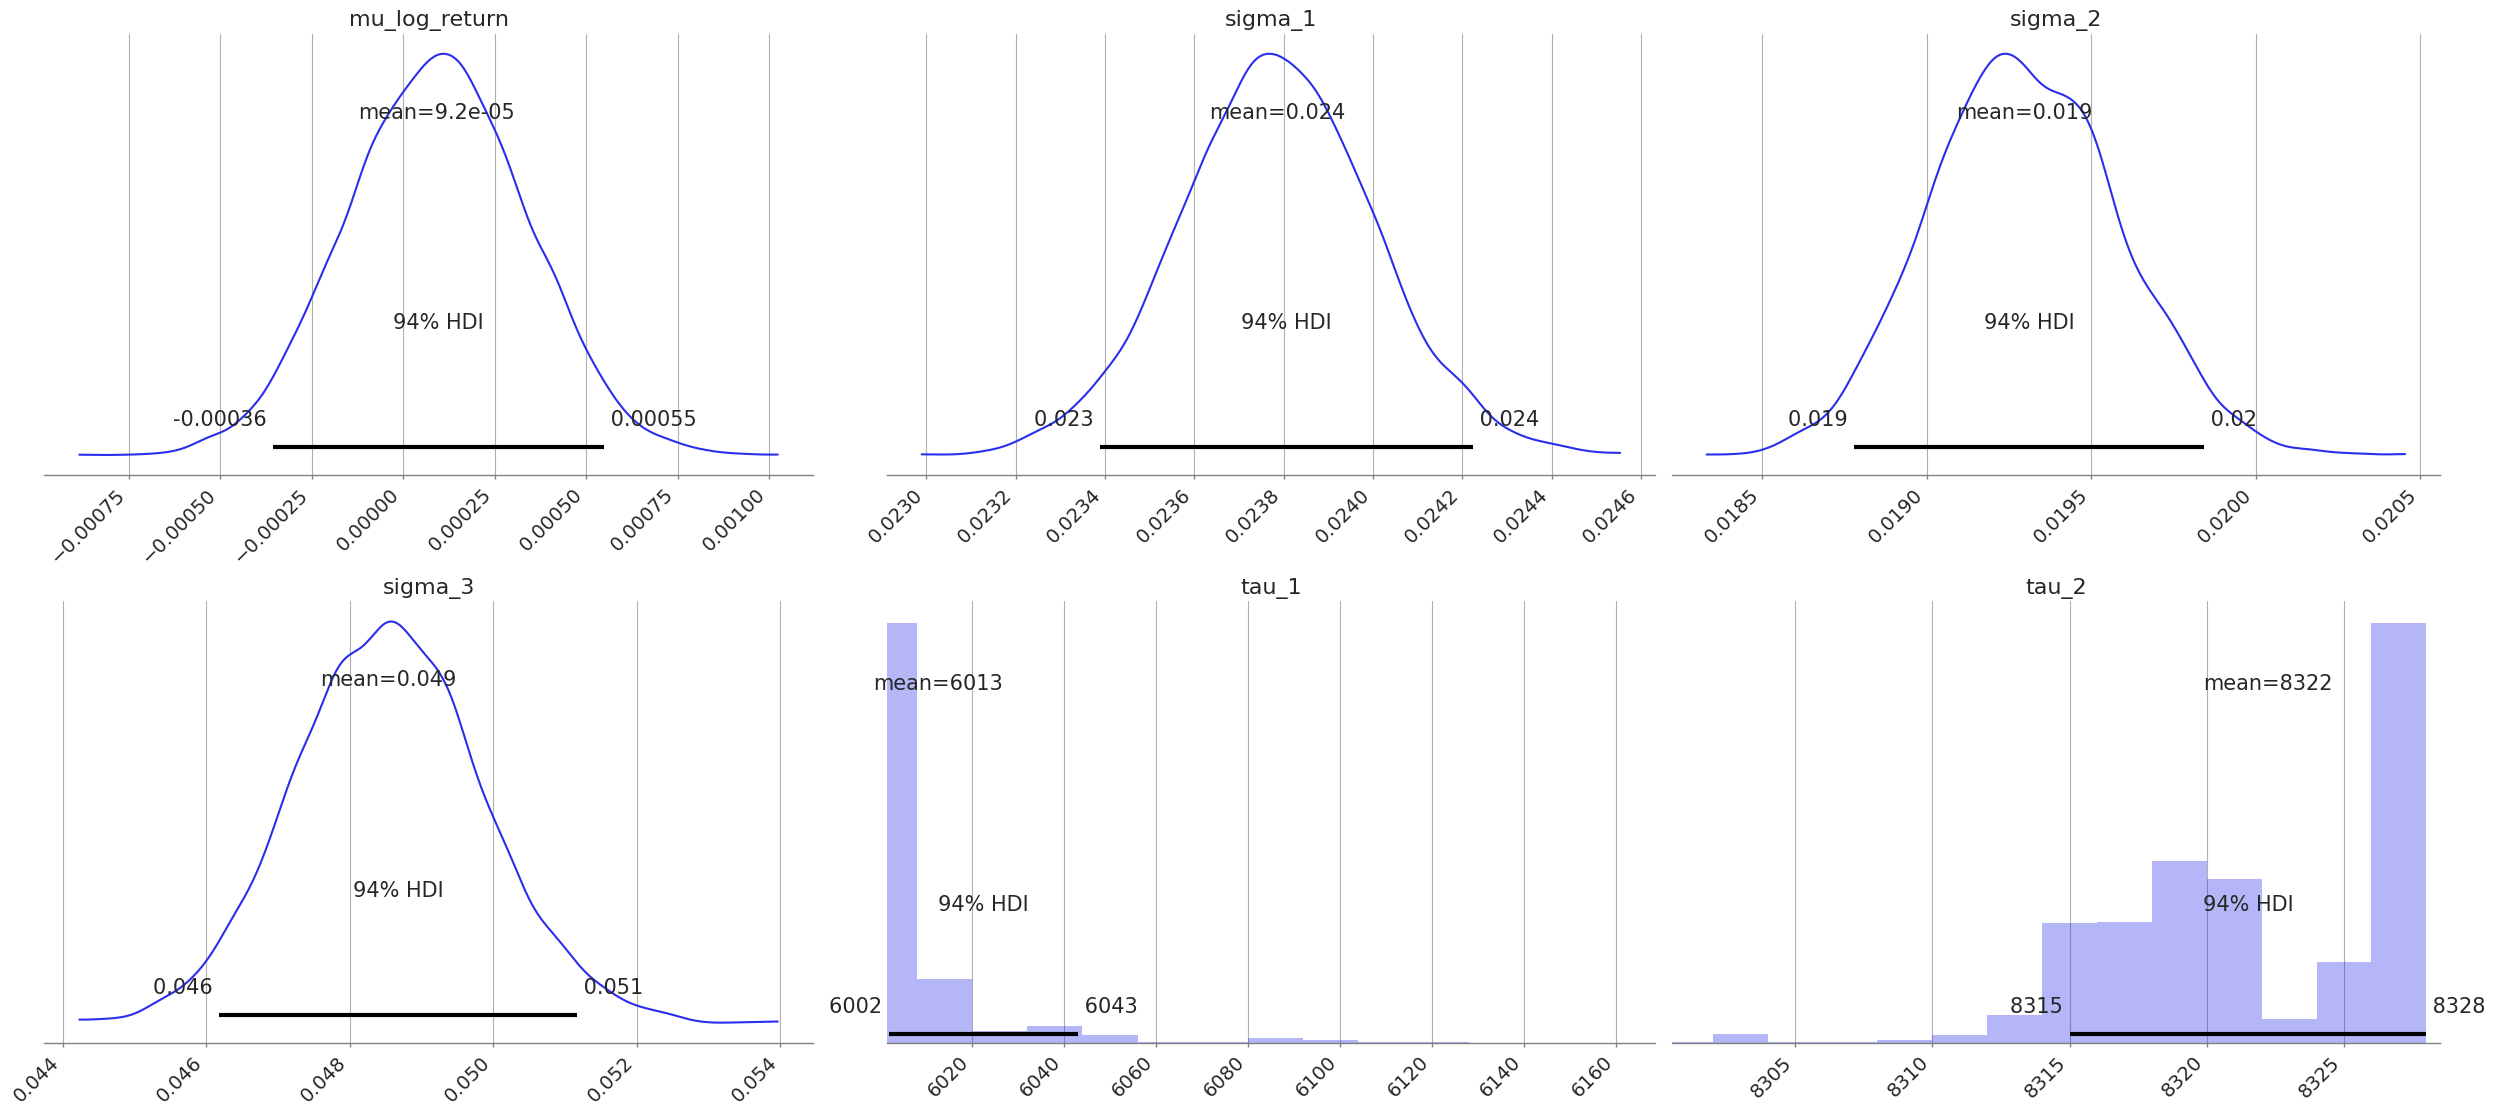

💾 Energy plot saved to ..\insights\model\energy_plot.png


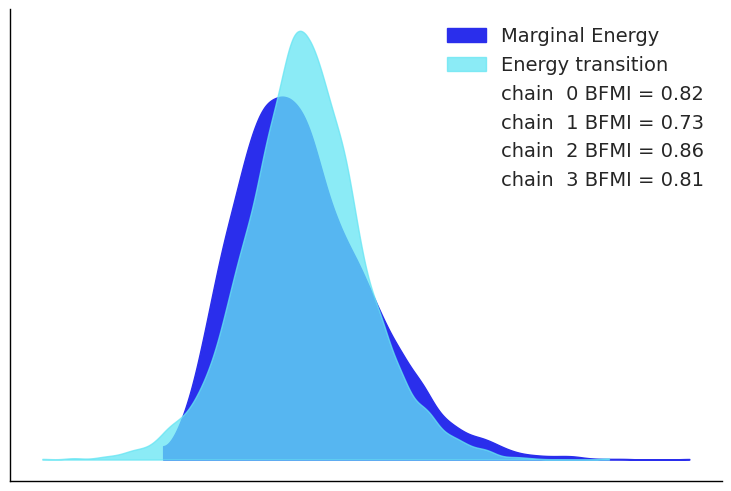

Event data loaded.

📍 Estimated Change Points:
  τ₁: 2011-01-14
  τ₂: 2020-02-26

🔎 Matching Events Within ±60 Days:
🕒 Around τ₁ (2011-01-14):
  Event has been found in this window.
🕒 Around τ₂ (2020-02-26):
  Event has been found in this window.


,Date,Event Name,Event Type,Description,MatchedTo,ChangePointDate,VolatilityBefore,VolatilityAfter,PriceBefore,PriceAfter,PriceChangePct
0,2011-02-01,Arab Spring,Geopolitical,Regional unrest affected multiple oil-producin...,τ₁,2011-01-14,0.0114,0.0163,92.8150,101.3300,9.1742
1,2011-03-01,Libyan Civil War,Geopolitical,Disrupted exports from a major oil producer,τ₁,2011-01-14,0.0114,0.0163,92.8150,101.3300,9.1742
2,2011-03-01,Middle East Unrest Spike,Geopolitical,Uncertainty from regional turmoil pushed Brent...,τ₁,2011-01-14,0.0114,0.0163,92.8150,101.3300,9.1742
3,2020-01-03,U.S.–Iran Conflict,Geopolitical,Airstrike and retaliation raised fears of Midd...,τ₂,2020-02-26,0.0198,0.1423,58.3803,32.5673,-44.2153
4,2020-04-01,COVID-19 Pandemic,Economic Shock,Demand collapse led to historic price crash; W...,τ₂,2020-02-26,0.0198,0.1423,58.3803,32.5673,-44.2153



💾 All matched events saved to: ..\data\processed\matched_events.csv


In [5]:
# Run full Bayesian change point analysis
model.run_analysis()